In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
all = pd.read_excel('10. ДЖКХ + ДИТ/5. Перечень событий за период 01.10.2023-30.04.2023 (ЦУ КГХ)/События за период_01.01.2024-30.04.2024.xlsx',
                  header=1, skiprows=[0])
all

,Названия строк,Количество по полю Источник
0,P1 <= 0,933
1,P2 <= 0,336
2,T1 < min,958
3,T1 > max,4808
4,Аварийная протечка труб в подъезде,3
5,Крупные пожары,1
6,Отсутствие отопления в доме,842
7,Протечка труб в подъезде,182
8,Сильная течь в системе отопления,462
9,Температура в квартире ниже нормативной,30254


In [71]:
df = pd.read_excel('10. ДЖКХ + ДИТ/5. Перечень событий за период 01.10.2023-30.04.2023 (ЦУ КГХ)/События за период_01.01.2024-30.04.2024.xlsx',
                  sheet_name="Выгрузка")
df

,Наименование,Источник,Дата создания во внешней системе,Дата закрытия,Округ,УНОМ,Адрес,Дата и время завершения события во внешней системе
0,Лифт требует ремонта,EDC,2024-03-10 14:52:57.000000,2024-03-10 14:56:08.183000,ВАО,64137.0,внутригородская территория муниципальный округ...,2024-03-10 16:35:37.366000
1,Лифт требует ремонта,EDC,2024-01-14 16:57:54.000000,2024-01-14 17:03:17.961000,ВАО,380.0,внутригородская территория муниципальный округ...,2024-01-15 10:09:27.502000
2,Лифт требует ремонта,EDC,2024-01-14 14:00:01.000000,2024-01-14 14:04:48.621000,ВАО,380.0,внутригородская территория муниципальный округ...,2024-01-14 16:59:01.571000
3,Протечка с кровли,EDC,2024-01-24 12:06:28.000000,2024-01-24 12:09:12.944000,ВАО,380.0,внутригородская территория муниципальный округ...,2024-01-24 14:05:31.400000
4,Нет связи с УСПД,ASUPR,2024-03-11 22:12:07.000000,2024-03-12 10:40:58.780000,ВАО,380.0,внутригородская территория муниципальный округ...,2024-03-12 10:40:58.991000
...,...,...,...,...,...,...,...,...
497098,Повреждение/уничтожение МАФ,NG,2024-05-05 18:18:47.000000,2024-05-05 18:24:49.682000,ВАО,NaN,NaN,2024-05-07 10:27:24.349000
497099,Повреждение урны,NG,2024-05-07 11:46:13.000000,2024-05-07 11:54:00.192000,ВАО,NaN,NaN,2024-05-09 15:24:11.894000
497100,Низкий уровень сигнала GSM,ASUPR,2024-04-22 07:35:47.000000,2024-04-22 07:36:27.352000,ВАО,15760.0,внутригородская территория муниципальный округ...,NaN
497101,Поломка почтовых ящиков,EDC,2024-04-19 11:44:07.000000,2024-04-19 11:47:29.402000,ВАО,15760.0,внутригородская территория муниципальный округ...,2024-04-19 15:04:42.796000


In [32]:
def plot_gist_categorical(df, col):
    value_counts = df[col].value_counts().sort_values(ascending=True)

    plt.figure(figsize=(10, 6))
    value_counts.plot(kind='barh')
    plt.ylabel(col)
    plt.xlabel('Количество')
    plt.tight_layout()
    
    plt.show()

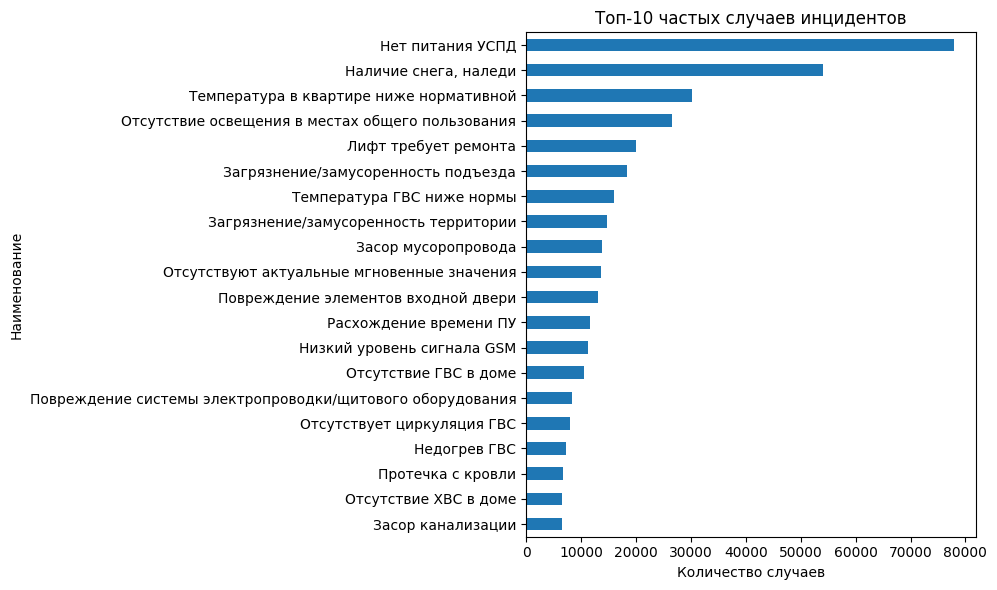

In [4]:
value_counts = df['Наименование'].value_counts().sort_values(ascending=True).tail(20)

plt.figure(figsize=(10, 6))
value_counts.plot(kind='barh')
plt.title('Топ-10 частых случаев инцидентов')
plt.ylabel('Наименование')
plt.xlabel('Количество случаев')
plt.tight_layout()

plt.show()

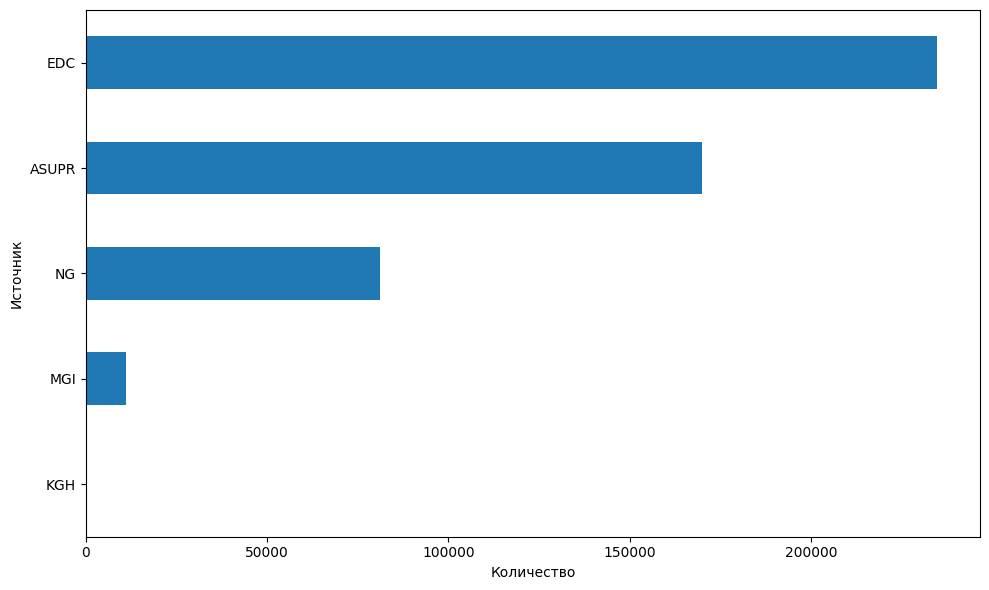

In [33]:
plot_gist_categorical(df, "Источник")

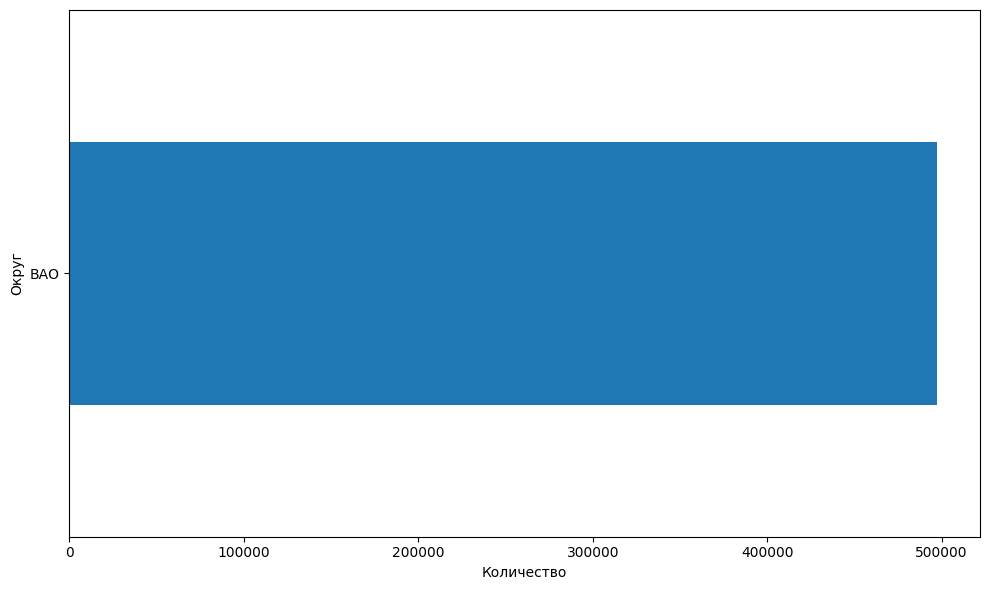

In [34]:
plot_gist_categorical(df, "Округ")

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497103 entries, 0 to 497102
Data columns (total 8 columns):
 #   Column                                              Non-Null Count   Dtype  
---  ------                                              --------------   -----  
 0   Наименование                                        497103 non-null  object 
 1   Источник                                            497103 non-null  object 
 2   Дата создания во внешней системе                    497103 non-null  object 
 3   Дата закрытия                                       466819 non-null  object 
 4   Округ                                               497103 non-null  object 
 5   УНОМ                                                495175 non-null  float64
 6   Адрес                                               495175 non-null  object 
 7   Дата и время завершения события во внешней системе  433213 non-null  object 
dtypes: float64(1), object(7)
memory usage: 30.3+ MB


In [36]:
len(df['УНОМ'].unique())

5046

In [72]:
bti = pd.read_excel("10. ДЖКХ + ДИТ/9. Выгрузка БТИ.xlsx", header=0, skiprows=[0])
bti = bti.rename(columns={'Unnamed: 0': 'Номер',
                           'Unnamed: 11': 'УНОМ',
                           'Unnamed: 12': 'UNAD',
                           })
bti

,Номер,Город,Административный округ,Муниципальный округ,Населенный пункт,Улица,Тип номера дом,Номер дома,Номер корпуса,Тип номера строения/сооружения,Номер строения,УНОМ,UNAD,Материал,Назначение,Класс,Тип,Этажность,Признак,Общая площадь
0,15,город Москва,Восточный административный округ,муниципальный округ Косино-Ухтомский,NaN,Златоустовская улица,дом,21,NaN,NaN,NaN,8450,1,NaN,NaN,жилые,Здание,NaN,NaN,NaN
1,17,город Москва,Восточный административный округ,муниципальный округ Косино-Ухтомский,NaN,Большая Косинская улица,дом,34В,NaN,NaN,NaN,51067,1,деревянные,индивидуальное жилое строение,жилые,Здание,1.0,NaN,"90,1"
2,18,город Москва,Восточный административный округ,муниципальный округ Ивановское,NaN,Зелёный проспект,дом,101,NaN,NaN,NaN,8425,1,NaN,NaN,жилые,Здание,NaN,NaN,NaN
3,19,город Москва,Восточный административный округ,муниципальный округ Ивановское,NaN,Зелёный проспект,дом,103,NaN,NaN,NaN,8426,1,NaN,NaN,жилые,Здание,NaN,NaN,NaN
4,53,город Москва,Восточный административный округ,муниципальный округ Косино-Ухтомский,NaN,улица Чёрное Озеро,дом,7,1,NaN,NaN,28680,1,NaN,NaN,жилые,Здание,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16560,284511,город Москва,Восточный административный округ,муниципальный округ Измайлово,NaN,Вернисажная улица,сооружение,4А,NaN,NaN,NaN,5276478,1,NaN,переход надземный,площадное,Сооружение,NaN,NaN,NaN
16561,284556,город Москва,Восточный административный округ,муниципальный округ Измайлово,NaN,городок имени Баумана,сооружение,1,NaN,строение,42,5246967,1,NaN,прочее,площадное,Сооружение,NaN,NaN,NaN
16562,284589,город Москва,Восточный административный округ,муниципальный округ Богородское,NaN,Тюменский проезд,NaN,NaN,NaN,сооружение,3Б,5298941,1,NaN,прочее,площадное,Сооружение,1.0,NaN,NaN
16563,284590,город Москва,Восточный административный округ,муниципальный округ Богородское,NaN,Тюменский проезд,NaN,NaN,NaN,сооружение,3В,5298942,1,NaN,прочее,площадное,Сооружение,1.0,NaN,NaN


In [49]:
bti.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16565 entries, 0 to 16564
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Номер                           16565 non-null  int64  
 1   Город                           16565 non-null  object 
 2   Административный округ          16565 non-null  object 
 3   Муниципальный округ             16565 non-null  object 
 4   Населенный пункт                56 non-null     object 
 5   Улица                           16509 non-null  object 
 6   Тип номера дом                  16546 non-null  object 
 7   Номер дома                      16546 non-null  object 
 8   Номер корпуса                   3791 non-null   object 
 9   Тип номера строения/сооружения  8134 non-null   object 
 10  Номер строения                  8134 non-null   object 
 11  УНОМ                            16565 non-null  int64  
 12  UNAD                            

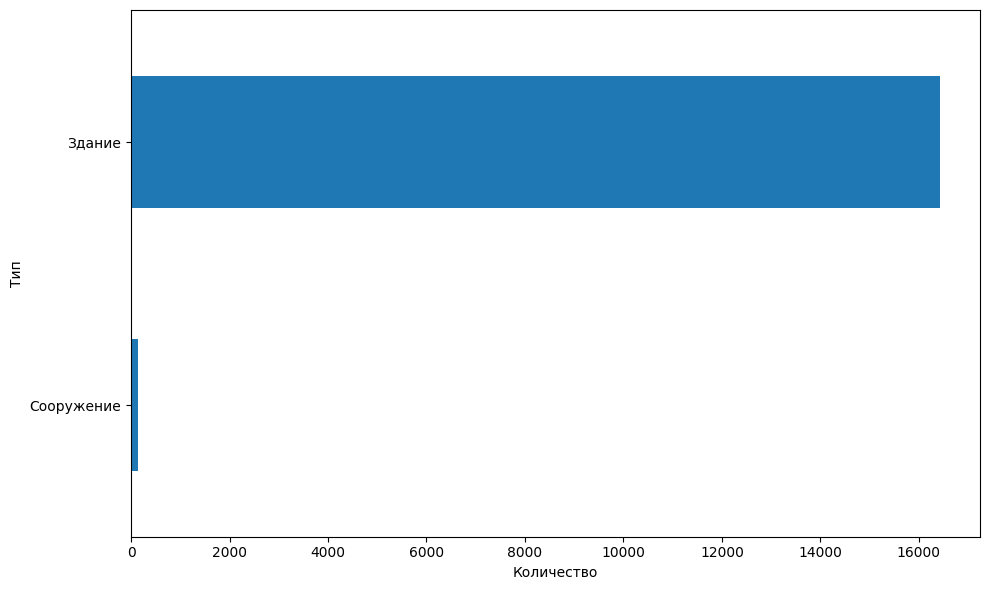

In [50]:
plot_gist_categorical(bti, "Тип")

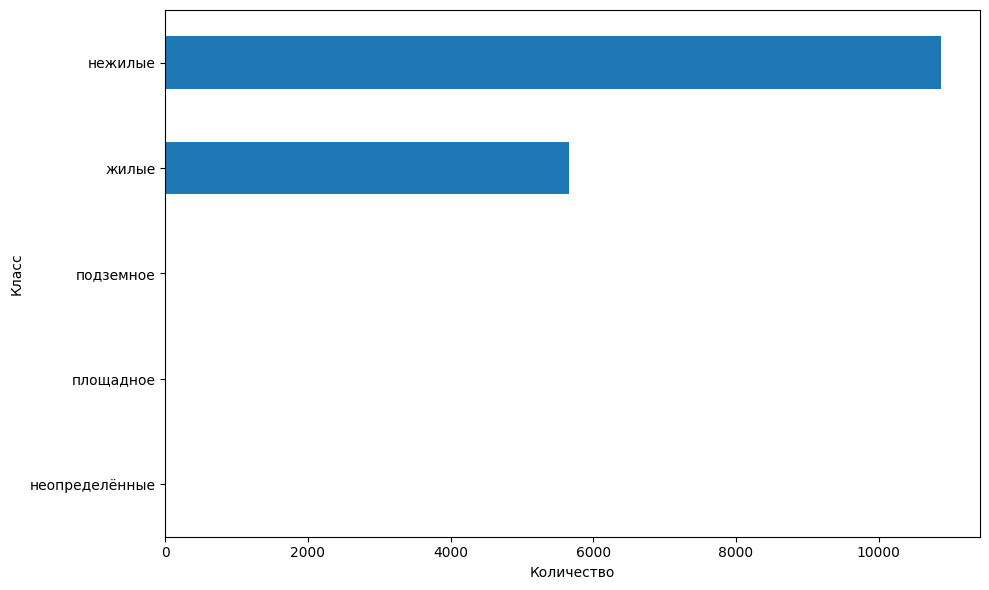

In [51]:
plot_gist_categorical(bti, "Класс")

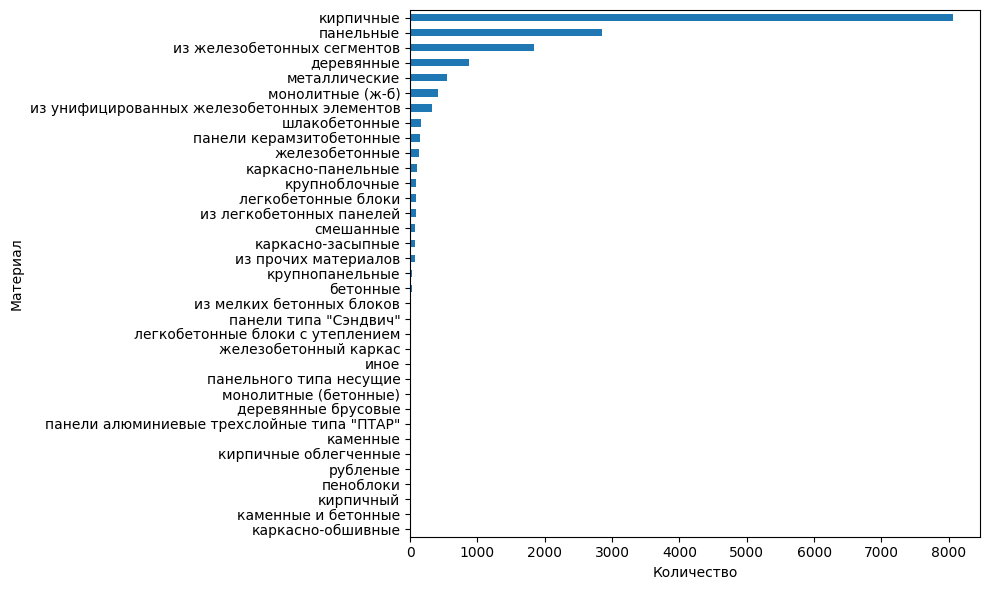

In [52]:
plot_gist_categorical(bti, "Материал")

In [73]:
cols2merge = ["УНОМ", "Тип", "Класс", "Материал", "Этажность", "Общая площадь"]
df = df.merge(bti[cols2merge], how = "left", on = "УНОМ")
df

,Наименование,Источник,Дата создания во внешней системе,Дата закрытия,Округ,УНОМ,Адрес,Дата и время завершения события во внешней системе,Тип,Класс,Материал,Этажность,Общая площадь
0,Лифт требует ремонта,EDC,2024-03-10 14:52:57.000000,2024-03-10 14:56:08.183000,ВАО,64137.0,внутригородская территория муниципальный округ...,2024-03-10 16:35:37.366000,Здание,жилые,панельные,17.0,"13955,8"
1,Лифт требует ремонта,EDC,2024-01-14 16:57:54.000000,2024-01-14 17:03:17.961000,ВАО,380.0,внутригородская территория муниципальный округ...,2024-01-15 10:09:27.502000,Здание,жилые,из железобетонных сегментов,12.0,"3624,5"
2,Лифт требует ремонта,EDC,2024-01-14 14:00:01.000000,2024-01-14 14:04:48.621000,ВАО,380.0,внутригородская территория муниципальный округ...,2024-01-14 16:59:01.571000,Здание,жилые,из железобетонных сегментов,12.0,"3624,5"
3,Протечка с кровли,EDC,2024-01-24 12:06:28.000000,2024-01-24 12:09:12.944000,ВАО,380.0,внутригородская территория муниципальный округ...,2024-01-24 14:05:31.400000,Здание,жилые,из железобетонных сегментов,12.0,"3624,5"
4,Нет связи с УСПД,ASUPR,2024-03-11 22:12:07.000000,2024-03-12 10:40:58.780000,ВАО,380.0,внутригородская территория муниципальный округ...,2024-03-12 10:40:58.991000,Здание,жилые,из железобетонных сегментов,12.0,"3624,5"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
497098,Повреждение/уничтожение МАФ,NG,2024-05-05 18:18:47.000000,2024-05-05 18:24:49.682000,ВАО,NaN,NaN,2024-05-07 10:27:24.349000,NaN,NaN,NaN,NaN,NaN
497099,Повреждение урны,NG,2024-05-07 11:46:13.000000,2024-05-07 11:54:00.192000,ВАО,NaN,NaN,2024-05-09 15:24:11.894000,NaN,NaN,NaN,NaN,NaN
497100,Низкий уровень сигнала GSM,ASUPR,2024-04-22 07:35:47.000000,2024-04-22 07:36:27.352000,ВАО,15760.0,внутригородская территория муниципальный округ...,NaN,Здание,жилые,панельные,5.0,"2567,4"
497101,Поломка почтовых ящиков,EDC,2024-04-19 11:44:07.000000,2024-04-19 11:47:29.402000,ВАО,15760.0,внутригородская территория муниципальный округ...,2024-04-19 15:04:42.796000,Здание,жилые,панельные,5.0,"2567,4"


In [74]:
ekonom = pd.read_excel('10. ДЖКХ + ДИТ/14. ВАО_Многоквартирные_дома_с_технико_экономическими_характеристиками.xlsx',
                      header=0, skiprows=[0])
ekonom = ekonom.drop('Unnamed: 20', axis=1)
ekonom

,Адрес из сторонней системы,Идентификатор из сторонней системы,Адрес по БТИ,УНОМ,Округ,Район,Серии проектов,Количество этажей,Количество подъездов,Количество квартир,...,Общая площадь нежилых помещений,Износ объекта (по БТИ),Материалы стен,Признак аварийности здания,Количество пассажирских лифтов,Количество грузопассажирских лифтов,Очередность уборки кровли,Материалы кровли по БТИ,Типы жилищного фонда,Статусы МКД
0,"Дом по адресу РФ, г. Москва, вн.тер.г. м.о. Но...",1520521,"город Москва, Суздальская улица, дом 24, корпус 2",31783,Восточный административный округ,муниципальный округ Новокосино,2048785,14,3.0,130.0,...,595.6,NaN,2048929,22728486,6.0,0.0,NaN,22289207.0,42875644,58761330
1,"Дом по адресу РФ, г. Москва, вн.тер.г. м.о. Со...",1526496,"город Москва, улица Сокольнический Вал, дом 4",24231,Восточный административный округ,муниципальный округ Сокольники,2048912,5,3.0,61.0,...,203.6,NaN,179625090,22728486,0.0,0.0,22289162.0,22289201.0,42875644,58761330
2,"Дом по адресу РФ, г. Москва, вн.тер.г. м.о. Но...",1502303,"город Москва, Новокосинская улица, дом 38, кор...",16560,Восточный административный округ,муниципальный округ Новокосино,2048777,17,2.0,128.0,...,2547.5,NaN,2048929,22728486,2.0,2.0,NaN,22289201.0,42875644,58761330
3,"Дом по адресу РФ, г. Москва, вн.тер.г. м.о. Ив...",1502774,"город Москва, Малый Купавенский проезд, дом 1",12180,Восточный административный округ,муниципальный округ Ивановское,2048789,16,2.0,206.0,...,1021.8,NaN,179625089,22728486,2.0,2.0,NaN,22289201.0,42875644,58761330
4,"Дом по адресу РФ, г. Москва, вн.тер.г. м.о. Из...",1502277,"город Москва, 5-я Парковая улица, дом 52",18617,Восточный административный округ,муниципальный округ Измайлово,2048912,5,9.0,155.0,...,2208,NaN,179625102,22728486,0.0,0.0,22289162.0,22289205.0,42875644,58761330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4367,"Дом по адресу РФ, г. Москва, вн.тер.г. м.о. Со...",1519928,"город Москва, проезд Энтузиастов, дом 19Б",65025,Восточный административный округ,муниципальный округ Соколиная Гора,2048912,5,3.0,60.0,...,496.9,NaN,179625102,22728486,0.0,0.0,22289163.0,22289205.0,42875644,58761330
4368,"Дом по адресу РФ, г. Москва, вн.тер.г. м.о. Во...",1534952,"город Москва, Первомайская улица, дом 119",19224,Восточный административный округ,муниципальный округ Восточное Измайлово,2048798,5,5.0,70.0,...,996,NaN,179625102,22728486,0.0,0.0,22289162.0,22289204.0,42875644,58761330
4369,"Дом по адресу РФ, г. Москва, вн.тер.г. м.о. Во...",1515702,"город Москва, Первомайская улица, дом 112",65101,Восточный административный округ,муниципальный округ Восточное Измайлово,2048878,15,3.0,123.0,...,733.8,NaN,179625111,22728486,3.0,3.0,NaN,22289201.0,42875644,58761330
4370,"Дом по адресу РФ, г. Москва, вн.тер.г. м.о. Го...",1506627,"город Москва, Уральская улица, дом 6, корпус 8",26819,Восточный административный округ,муниципальный округ Гольяново,2048798,14,1.0,112.0,...,2024-01-22 00:00:00,NaN,179625102,22728486,1.0,1.0,NaN,22289201.0,42875644,58761330


In [62]:
ekonom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4372 entries, 0 to 4371
Data columns (total 22 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Адрес из сторонней системы           4372 non-null   object 
 1   Идентификатор из сторонней системы   4372 non-null   int64  
 2   Адрес по БТИ                         4372 non-null   object 
 3   УНОМ                                 4372 non-null   int64  
 4   Округ                                4372 non-null   object 
 5   Район                                4372 non-null   object 
 6   Серии проектов                       4372 non-null   int64  
 7   Количество этажей                    4372 non-null   int64  
 8   Количество подъездов                 4358 non-null   float64
 9   Количество квартир                   4367 non-null   float64
 10  Общая площадь                        4372 non-null   float64
 11  Общая площадь жилых помещений 

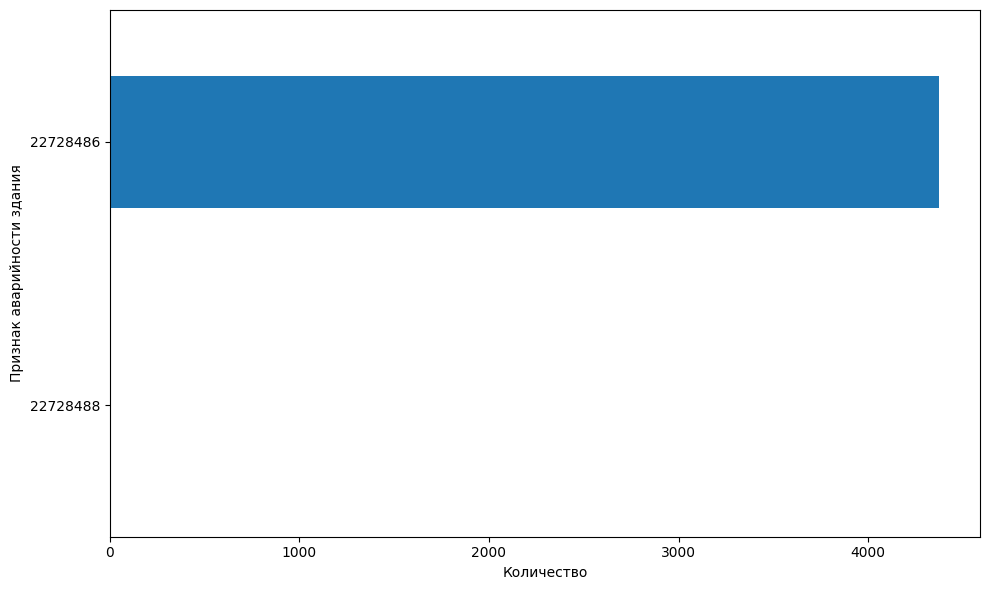

In [63]:
plot_gist_categorical(ekonom, "Признак аварийности здания")

In [75]:
cols2merge = ["УНОМ", "Серии проектов", "Количество подъездов", "Количество квартир",
             "Общая площадь жилых помещений", "Общая площадь нежилых помещений",
             "Признак аварийности здания", "Количество пассажирских лифтов", "Очередность уборки кровли",
             "Материалы кровли по БТИ", "Типы жилищного фонда", "Статусы МКД"]
df = df.merge(ekonom[cols2merge], how = "left", on = "УНОМ")
df

,Наименование,Источник,Дата создания во внешней системе,Дата закрытия,Округ,УНОМ,Адрес,Дата и время завершения события во внешней системе,Тип,Класс,...,Количество подъездов,Количество квартир,Общая площадь жилых помещений,Общая площадь нежилых помещений,Признак аварийности здания,Количество пассажирских лифтов,Очередность уборки кровли,Материалы кровли по БТИ,Типы жилищного фонда,Статусы МКД
0,Лифт требует ремонта,EDC,2024-03-10 14:52:57.000000,2024-03-10 14:56:08.183000,ВАО,64137.0,внутригородская территория муниципальный округ...,2024-03-10 16:35:37.366000,Здание,жилые,...,4.0,243.0,13793.1,162.7,22728486.0,4.0,NaN,22289207.0,42875644.0,58761330.0
1,Лифт требует ремонта,EDC,2024-01-14 16:57:54.000000,2024-01-14 17:03:17.961000,ВАО,380.0,внутригородская территория муниципальный округ...,2024-01-15 10:09:27.502000,Здание,жилые,...,1.0,84.0,3624.5,0,22728486.0,2.0,NaN,22289201.0,42875644.0,58761330.0
2,Лифт требует ремонта,EDC,2024-01-14 14:00:01.000000,2024-01-14 14:04:48.621000,ВАО,380.0,внутригородская территория муниципальный округ...,2024-01-14 16:59:01.571000,Здание,жилые,...,1.0,84.0,3624.5,0,22728486.0,2.0,NaN,22289201.0,42875644.0,58761330.0
3,Протечка с кровли,EDC,2024-01-24 12:06:28.000000,2024-01-24 12:09:12.944000,ВАО,380.0,внутригородская территория муниципальный округ...,2024-01-24 14:05:31.400000,Здание,жилые,...,1.0,84.0,3624.5,0,22728486.0,2.0,NaN,22289201.0,42875644.0,58761330.0
4,Нет связи с УСПД,ASUPR,2024-03-11 22:12:07.000000,2024-03-12 10:40:58.780000,ВАО,380.0,внутригородская территория муниципальный округ...,2024-03-12 10:40:58.991000,Здание,жилые,...,1.0,84.0,3624.5,0,22728486.0,2.0,NaN,22289201.0,42875644.0,58761330.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
497098,Повреждение/уничтожение МАФ,NG,2024-05-05 18:18:47.000000,2024-05-05 18:24:49.682000,ВАО,NaN,NaN,2024-05-07 10:27:24.349000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
497099,Повреждение урны,NG,2024-05-07 11:46:13.000000,2024-05-07 11:54:00.192000,ВАО,NaN,NaN,2024-05-09 15:24:11.894000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
497100,Низкий уровень сигнала GSM,ASUPR,2024-04-22 07:35:47.000000,2024-04-22 07:36:27.352000,ВАО,15760.0,внутригородская территория муниципальный округ...,NaN,Здание,жилые,...,3.0,60.0,2567.4,0,22728486.0,0.0,22289163.0,22289201.0,42875644.0,58761330.0
497101,Поломка почтовых ящиков,EDC,2024-04-19 11:44:07.000000,2024-04-19 11:47:29.402000,ВАО,15760.0,внутригородская территория муниципальный округ...,2024-04-19 15:04:42.796000,Здание,жилые,...,3.0,60.0,2567.4,0,22728486.0,0.0,22289163.0,22289201.0,42875644.0,58761330.0


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 497103 entries, 0 to 497102
Data columns (total 24 columns):
 #   Column                                              Non-Null Count   Dtype  
---  ------                                              --------------   -----  
 0   Наименование                                        497103 non-null  object 
 1   Источник                                            497103 non-null  object 
 2   Дата создания во внешней системе                    497103 non-null  object 
 3   Дата закрытия                                       466819 non-null  object 
 4   Округ                                               497103 non-null  object 
 5   УНОМ                                                495175 non-null  float64
 6   Адрес                                               495175 non-null  object 
 7   Дата и время завершения события во внешней системе  433213 non-null  object 
 8   Тип                                                 494792 non-n